# ****SENTIMENT ANALYSIS****

# *Connecting google drive (for saving the model)*

In [2]:
from google.colab import drive
drive.mount('./content')

Mounted at ./content


# *Downloading the Dataset*


1.   Upload the kaggle.json file for authnetication and authorization
2.   Downloading the dataset from Kaggle
3.   Unzipping the zip file downloaded



In [2]:
from google.colab import files
files.upload() #upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deepugagan1612","key":"fa4e0fb55a9962632709ef33c55f58ed"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d yasserh/imdb-movie-ratings-sentiment-analysis


Dataset URL: https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis
License(s): CC0-1.0
 44% 9.00M/20.6M [00:00<00:00, 36.5MB/s]
100% 20.6M/20.6M [00:00<00:00, 66.9MB/s]


In [5]:
import zipfile
import os

# Unzip the dataset
with zipfile.ZipFile('/content/imdb-movie-ratings-sentiment-analysis.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # Extract to a folder named 'data'

# List the files
os.listdir('data')

['movie.csv']

# *Importing all the necessary libraries*

In [6]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

# *Data Preprocessing*

In [7]:
data=pd.read_csv('/content/data/movie.csv')

In [8]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [9]:
# Check for null values
null_values = data.isnull()
print(null_values)

        text  label
0      False  False
1      False  False
2      False  False
3      False  False
4      False  False
...      ...    ...
39995  False  False
39996  False  False
39997  False  False
39998  False  False
39999  False  False

[40000 rows x 2 columns]


In [10]:
len(data)

40000

In [11]:
#display the names of the colums of the data
data.columns

Index(['text', 'label'], dtype='object')

In [12]:
text=data['text']

In [13]:
text

,text
0,I grew up (b. 1965) watching and loving the Th...
1,"When I put this movie in my DVD player, and sa..."
2,Why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...
4,Im a die hard Dads Army fan and nothing will e...
...,...
39995,"""Western Union"" is something of a forgotten cl..."
39996,This movie is an incredible piece of work. It ...
39997,My wife and I watched this movie because we pl...
39998,"When I first watched Flatliners, I was amazed...."


# Converting All the words to lowercase to make the data case-insensitive and also to eliminate data redundancy

In [14]:
text=text.str.lower()

In [15]:
text

,text
0,i grew up (b. 1965) watching and loving the th...
1,"when i put this movie in my dvd player, and sa..."
2,why do people who do not know what a particula...
3,even though i have great interest in biblical ...
4,im a die hard dads army fan and nothing will e...
...,...
39995,"""western union"" is something of a forgotten cl..."
39996,this movie is an incredible piece of work. it ...
39997,my wife and i watched this movie because we pl...
39998,"when i first watched flatliners, i was amazed...."


# *Tokenizing the datset, where each word in the dataset is assigned a unique number*

In [16]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(text)

In [17]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'movie': 16,
 'with': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'you': 21,
 'not': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'one': 27,
 'he': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'so': 34,
 'who': 35,
 'from': 36,
 'like': 37,
 'or': 38,
 'just': 39,
 'her': 40,
 'about': 41,
 'out': 42,
 'if': 43,
 "it's": 44,
 'has': 45,
 'there': 46,
 'some': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'even': 56,
 'my': 57,
 'would': 58,
 'she': 59,
 'which': 60,
 'only': 61,
 'really': 62,
 'see': 63,
 'story': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'me': 68,
 'were': 69,
 'well': 70,
 'much': 71,
 'than': 72,
 'we': 73,
 'been': 74,
 'get': 75,
 'bad': 76,
 'will': 77,
 'also': 78,
 'do': 79,
 'other': 80,
 'great': 81,
 'into': 82,
 'p

In [18]:
print("Number of unique words in the dataset",len(tokenizer.word_index))

Number of unique words in the dataset 112203


# *Converting the input "sequence of words" to "sequence of numbers"*

In [19]:
input_sequences=tokenizer.texts_to_sequences(text)

In [20]:
max_len=max([len(seq) for seq in input_sequences])

# *Making all the input sentences in the dataset to same length by "PRE-PADDING"*

In [21]:
input_sequences=pad_sequences(input_sequences,maxlen=max_len,padding='pre')

In [22]:
input_sequences

array([[   0,    0,    0, ..., 5988,    4, 5890],
       [   0,    0,    0, ...,   20, 6238,  240],
       [   0,    0,    0, ...,   19, 2293, 5475],
       ...,
       [   0,    0,    0, ..., 4706,  785,   31],
       [   0,    0,    0, ...,    7,  733,  154],
       [   0,    0,    0, ...,   57,  943, 6779]], dtype=int32)

In [23]:
from tensorflow.keras.utils import to_categorical
Y=to_categorical(data['label'],num_classes=2)

# *Splitting the dataset to Training and Validation datasets*

In [24]:
(X_train,X_test,Y_train,Y_test)=train_test_split(input_sequences,Y,test_size=0.25,random_state=42)

# *Developing the Model:*
1. first layer -> Embedding layer producing a dense vector of shape (1,50) for each word
2. second layer -> LSTM layer to traverse and understand the input sequence
3. third layer -> Dense layer using gimoid function to make prediction as '0' or '1'

In [25]:
model=Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=50,input_length=max_len))
model.add(LSTM(units=150))
model.add(Dense(units=2,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
model.build(input_shape=(None, max_len))  # Explicitly build model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 2493, 50)            │       5,610,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 150)                 │         120,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             302 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,731,102 (21.86 MB)

 Trainable params: 5,731,102 (21.86 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(X_train, Y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(X_test, Y_test))


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 146ms/step - accuracy: 0.9848 - loss: 0.0467 - val_accuracy: 0.8748 - val_loss: 0.4839
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 139ms/step - accuracy: 0.9854 - loss: 0.0443 - val_accuracy: 0.8652 - val_loss: 0.4910
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 139ms/step - accuracy: 0.9928 - loss: 0.0243 - val_accuracy: 0.8709 - val_loss: 0.5806
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 139ms/step - accuracy: 0.9982 - loss: 0.0078 - val_accuracy: 0.8704 - val_loss: 0.6418
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 138ms/step - accuracy: 0.9971 - loss: 0.0105 - val_accuracy: 0.8641 - val_loss: 0.6068
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.9975 - loss: 0.0084 - val_accuracy: 0.8617 - val_loss: 0.5610
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 139ms/step - accuracy: 0.9964 - loss: 0.0131 - val_accuracy: 0.8675 - val_loss: 0.6341
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 139ms/step - accuracy: 0.9986 - loss: 0

In [32]:
# Extract accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

In [33]:
import matplotlib.pyplot as plt

# *Plotting the Training Accuracy Graph*

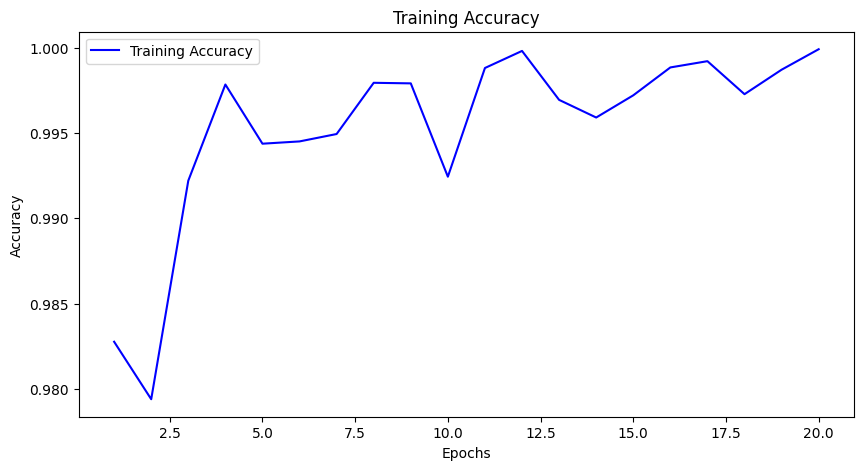

In [34]:
# Plot training accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# *Plotting the Validation Accuracy Graph*

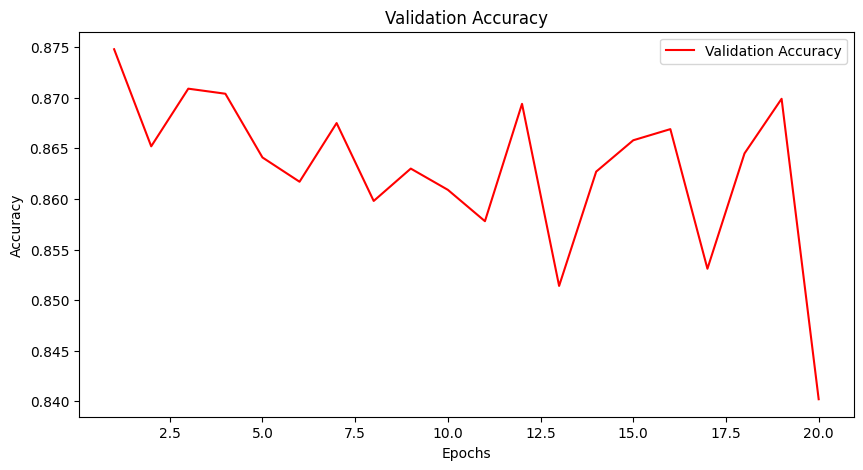

In [35]:
# Plot validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

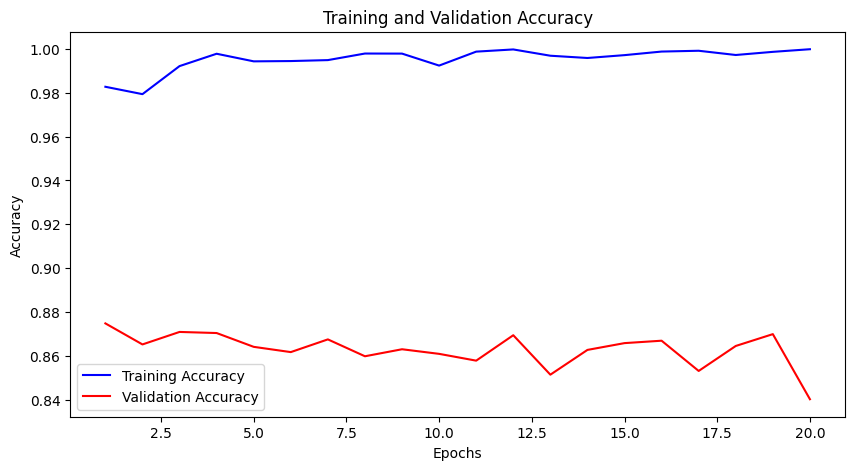

In [36]:
# Combined graph
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# *Saving the Model to drive as 'sentiment_analysis_model.h5' (for future use of the trained model)*

In [37]:
save_path='/content/drive/MyDrive/Projects/SentimentAnalysis'
if not os.path.exists(save_path):
  os.makedirs(save_path)

model.save(os.path.join(save_path,'sentiment_analysis_model.h5'))
print(f"Successfully saved 'sentiment_analysis_model.h5' at {os.path.join(save_path,'sentiment_analysis_model.h5')}")

Successfully saved 'sentiment_analysis_model.h5' at /content/drive/MyDrive/Projects/SentimentAnalysis/sentiment_analysis_model.h5


In [41]:
test_indices = np.random.randint(low=0, high=len(X_test), size=20)
print(test_indices)
for idx in test_indices:
  # Reshape the input to be a batch of size 1
  input_sequence = X_test[idx].reshape(1, -1)
  prediction = model.predict(input_sequence)

  # Get the predicted class by choosing the class with the higher probability
  predicted_class = np.argmax(prediction)  # 0 or 1 depending on which class has the higher probability

  print(f"{X_test[idx]} label={np.argmax(Y_test[idx])} prediction={predicted_class}")

[7250 3067 9771 1318 8982 9646 1122 4508 4662 4520  593 5094 1903 8767
  368 3259 8077 3380 9670 4627]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[    0     0     0 ...     1 50661   516] label=1 prediction=1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[   0    0    0 ...    4 6048 1949] label=0 prediction=0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[  0   0   0 ...   4 132  83] label=0 prediction=0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[  0   0   0 ...  70  92 636] label=1 prediction=1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[    0     0     0 ... 14191  1369    21] label=0 prediction=0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[   0    0    0 ...    4 1551  647] label=1 prediction=1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[  0   0   0 ... 490 733 154] label=1 prediction=1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[   0    0    0 ...    2  993 4362] label=0 prediction=0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[    0     0     0 ...  2601 13967  3711] label=1 prediction=1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[   